## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

-->mm23vs

Your full name: 

--> Vishanth Suresh

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [19]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt
import os
from PIL import Image
from torch.utils.data import Dataset
from natsort import natsorted
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
# always check your version
print(torch.__version__)

2.2.1


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [21]:
class Tiny(Dataset):
    def __init__(self, main_dir, transform):

       
        self.main_dir = main_dir
        self.transform = transform

       
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsorted(all_imgs)

In [22]:
def __len__(self):
    
    return len(self.total_imgs)

def __geti__(self, idx):
    img_loc = os.path.join(self.main_dir, self.total_imgs[idx])

   
    image = Image.open(img_loc).convert("RGB")
    
    tensor_image = self.transform(image)
    return tensor_image

In [23]:
from torchvision import transforms


transform = transforms.Compose([
    transforms.ToTensor(), 
])

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)
dataloader = DataLoader(dataset, batch_size=45, shuffle=True, drop_last=False)

print(next(iter(dataloader))[0].shape) 

torch.Size([45, 3, 64, 64])


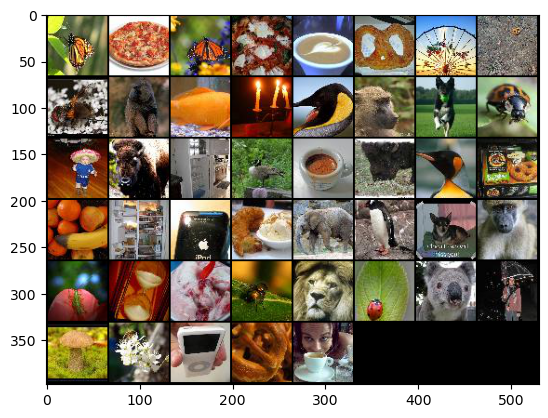

labels ['butterfly', 'pizza', 'butterfly', 'pizza', 'espresso', 'pretzel', 'umbrella', 'pretzel', 'fly', 'baboon', 'goldfish', 'candle', 'penguin', 'baboon', 'chihuahua', 'ladybug', 'sombrero', 'bison', 'refrigerator', 'goose', 'espresso', 'bison', 'penguin', 'pretzel', 'banana', 'refrigerator', 'ipod', 'icecream', 'elephant', 'penguin']


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm
classes = ("baboon", "banana", "bee", "bison", "butterfly", "candle", "cardigan", "chihuahua", "elephant", "espresso","fly","goldfish","goose","grasshopper","hourglass","icecream","ipod","jellyfish","koala","ladybug","lion","mushroom","penguin","pig","pizza","pretzel","redpanda","refrigerator","sombrero","umbrella")
def timshow(x):
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.show()

# get some random training images using the data loader
dataiter = iter(dataloader)
images, labels = next(dataiter)

# show images and labels
timshow(torchvision.utils.make_grid(images))

print(f"labels {[classes[labels[i]] for i in range(30)]}")

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [24]:
# TO COMPLETE
# define a MLP Model class
class MLP(nn.Module):
  def __init__(self, input_units, hidden_units, output_units):
    super(MLP, self).__init__()
    #define the first hidden Units
    self.hidden1 = nn.Linear(input_units, hidden_units)
    #define the activation functions
    self.activation = nn.ReLU()
    #define the output units
    self.output = nn.Linear(hidden_units, output_units)

  def forward(self, x):
    x = self.activation(self.hidden1(x))
    x = self.output(x)
    return x

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [25]:
# TO COMPLETE
# define a CNN Model class
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 45, kernel_size=3, padding=1)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.fc = nn.Linear(64 * 16 * 16, 30)

  def forward(self, x):
    x = self.maxpool(self.relu(self.conv1(x)))
    x = self.maxpool(self.relu(self.conv2(x)))
    x = x.view(-1, 64 * 16 * 16)
    x= self.fc(x)
    return x

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [26]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [377]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Constants
NUM_EPOCHS = 8

# Custom MLP model class
class MLPModel(nn.Module):
    def __init__(self, input_units, hidden_units1, hidden_units2, hidden_units3, output_units):
        super(MLPModel, self).__init__()
        self.hidden1 = nn.Linear(input_units, hidden_units1)
        self.activation1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_units1, hidden_units2)
        self.activation2 = nn.ReLU()
        self.hidden3 = nn.Linear(hidden_units2, hidden_units3)
        self.activation3 = nn.ReLU()
        self.output = nn.Linear(hidden_units3, output_units)

    def forward(self, x):
        x = self.activation1(self.hidden1(x))
        x = self.activation2(self.hidden2(x))
        x = self.activation3(self.hidden3(x))
        x = self.output(x)
        return x

# Helper function to calculate top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

# Define transformations for the dataset
transformations = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Load the dataset
dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/comp5625M_data_assessment_1/train_set/train_set', transform=transformations)

# Function to create data loaders
def create_data_loaders(dataset, test_ratio=0.2, batch_size=45, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

# Create data loaders
train_loader, val_loader = create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0)

# Initialize the model
model = MLPModel(input_units=64*64*3, hidden_units1=512, hidden_units2=256, hidden_units3=128, output_units=len(dataset.classes))

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Lists to store training and validation metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0

    for data, target in train_loader:
        data = data.view(data.size(0), -1)  
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))[0]
        total_correct += accuracy_percent * target.size(0) / 100.0  
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            data = data.view(data.size(0), -1) 
            output = model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))[0]
            val_correct += accuracy_percent * target.size(0) / 100.0  
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


Epoch 1: Train Loss: 3.4017, Train Accuracy: 3.32%, Val Loss: 3.4008, Val Accuracy: 3.53%
Epoch 2: Train Loss: 3.3996, Train Accuracy: 3.36%, Val Loss: 3.3990, Val Accuracy: 3.50%
Epoch 3: Train Loss: 3.3976, Train Accuracy: 3.51%, Val Loss: 3.3972, Val Accuracy: 3.94%
Epoch 4: Train Loss: 3.3954, Train Accuracy: 4.20%, Val Loss: 3.3951, Val Accuracy: 4.69%
Epoch 5: Train Loss: 3.3931, Train Accuracy: 5.29%, Val Loss: 3.3930, Val Accuracy: 5.84%
Epoch 6: Train Loss: 3.3907, Train Accuracy: 6.32%, Val Loss: 3.3907, Val Accuracy: 6.58%
Epoch 7: Train Loss: 3.3880, Train Accuracy: 6.78%, Val Loss: 3.3881, Val Accuracy: 7.55%
Epoch 8: Train Loss: 3.3851, Train Accuracy: 7.72%, Val Loss: 3.3853, Val Accuracy: 8.07%


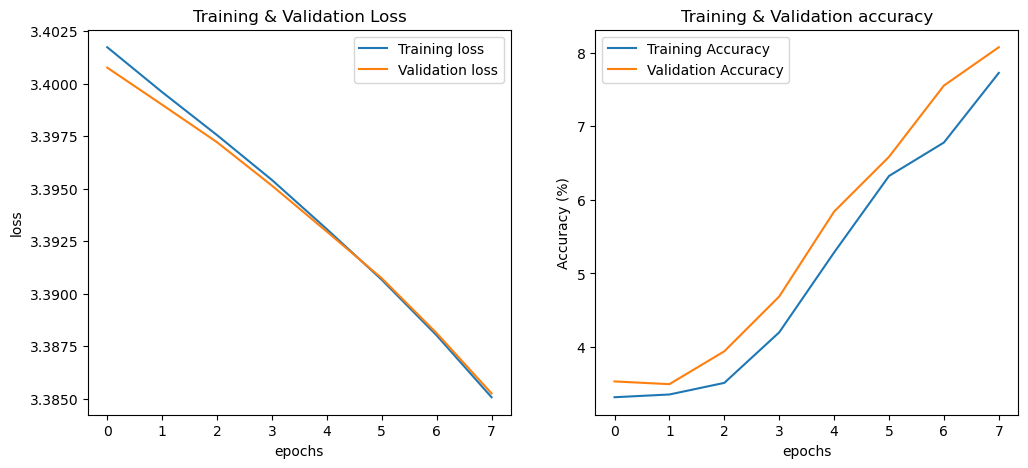

In [378]:
# Your graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [381]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define CNN Model with three hidden layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)  # Third hidden layer
        self.fc3 = nn.Linear(256, 128)  # Fourth hidden layer
        self.fc4 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))  # Third hidden layer
        x = self.relu(self.fc3(x))  # Fourth hidden layer
        x = self.fc4(x)
        return x

# Helper function -- Define top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # return top-1

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
custom_dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

# Split the dataset
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(custom_dataset, test_ratio=0.2, batch_size=32, seed=0)

# Instantiate the model. loss function, and optimizer
custom_model = CustomCNN()
optimizer = optim.Adam(custom_model.parameters(), lr=0.001)  # Changed to SGD
loss_function = nn.CrossEntropyLoss()

# Train and Val
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 8

for epoch in range(num_epochs):
    custom_model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = custom_model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Val
    custom_model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = custom_model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


Epoch 1: Train Loss: 3.3743, Train Accuracy: 4.13%, Val Loss: 3.3498, Val Accuracy: 5.06%
Epoch 2: Train Loss: 3.2274, Train Accuracy: 8.20%, Val Loss: 3.0662, Val Accuracy: 10.75%
Epoch 3: Train Loss: 2.9717, Train Accuracy: 14.02%, Val Loss: 2.8390, Val Accuracy: 17.04%
Epoch 4: Train Loss: 2.7405, Train Accuracy: 19.77%, Val Loss: 2.6409, Val Accuracy: 21.50%
Epoch 5: Train Loss: 2.5160, Train Accuracy: 25.37%, Val Loss: 2.5022, Val Accuracy: 26.41%
Epoch 6: Train Loss: 2.3103, Train Accuracy: 31.46%, Val Loss: 2.4175, Val Accuracy: 27.98%
Epoch 7: Train Loss: 2.0904, Train Accuracy: 37.59%, Val Loss: 2.3347, Val Accuracy: 31.85%
Epoch 8: Train Loss: 1.8419, Train Accuracy: 44.58%, Val Loss: 2.3383, Val Accuracy: 33.97%


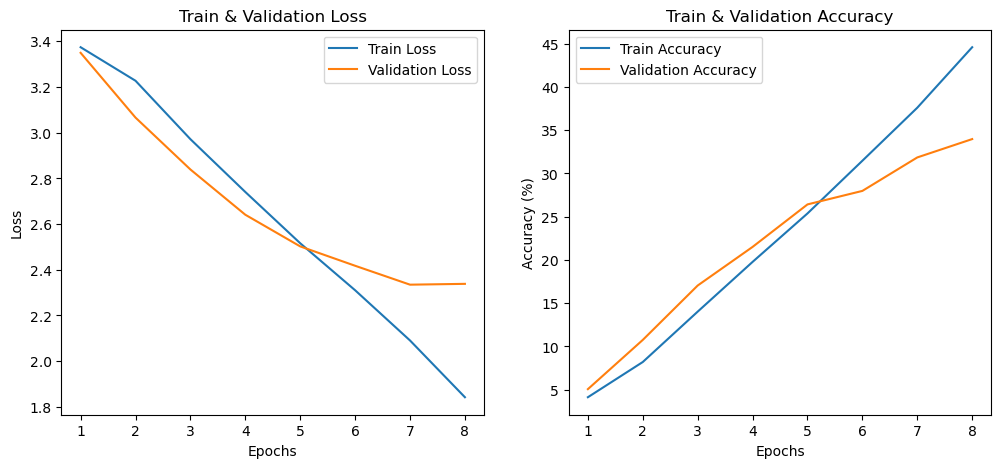

In [382]:
# Your graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.title('Train & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

It is observed that MLP model with 8 epochs took more to finish training with very low accuracy at 8%. Whereas for CNN, 8 epochs took less time to train when compared to MLP and ended in accuracy over 33.9% . This proves that by convoluting, image filtering has been done. Feature extraction plays a vital role in training the dataset in an effective manner.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [388]:
classes = ("baboon", "banana", "bee", "bison", "butterfly", "candle", "cardigan", "chihuahua", "elephant", "espresso","fly","goldfish","goose","grasshopper","hourglass","icecream","ipod","jellyfish","koala","ladybug","lion","mushroom","penguin","pig","pizza","pretzel","redpanda","refrigerator","sombrero","umbrella")

In [389]:
from sklearn.metrics import confusion_matrix
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def get_confusion_matrix(model, loader):
    y_actual = []
    y_pred = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            preds = model(images)
            _, predicted = torch.max(preds, 1)
            y_actual += labels.cpu().numpy().tolist()
            y_pred += predicted.cpu().numpy().tolist()
            #all_preds = torch.cat((all_preds, preds), dim=0)
    cm = confusion_matrix(y_actual, y_pred)
    return cm 

In [ ]:
train_cm = get_confusion_matrix(custom_model, train_loader)
validation_cm = get_confusion_matrix(custom_model, val_loader)

In [442]:
def plot_confuion_matrix(cm):
    fig, ax1 = plt.subplots(figsize=(10,10))
    ax1.imshow(cm,cmap='Greens')
    ax1.set_title('Confusion Matrix')
    ax1.set_xticks(np.arange(30))
    ax1.set_yticks(np.arange(30))
    ax1.set_xticklabels(classes, rotation = 90)
    ax1.set_yticklabels(classes)
    ax1.set_xlabel('Predicted label')
    ax1.set_ylabel('True label')
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax1.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')
    plt.show()

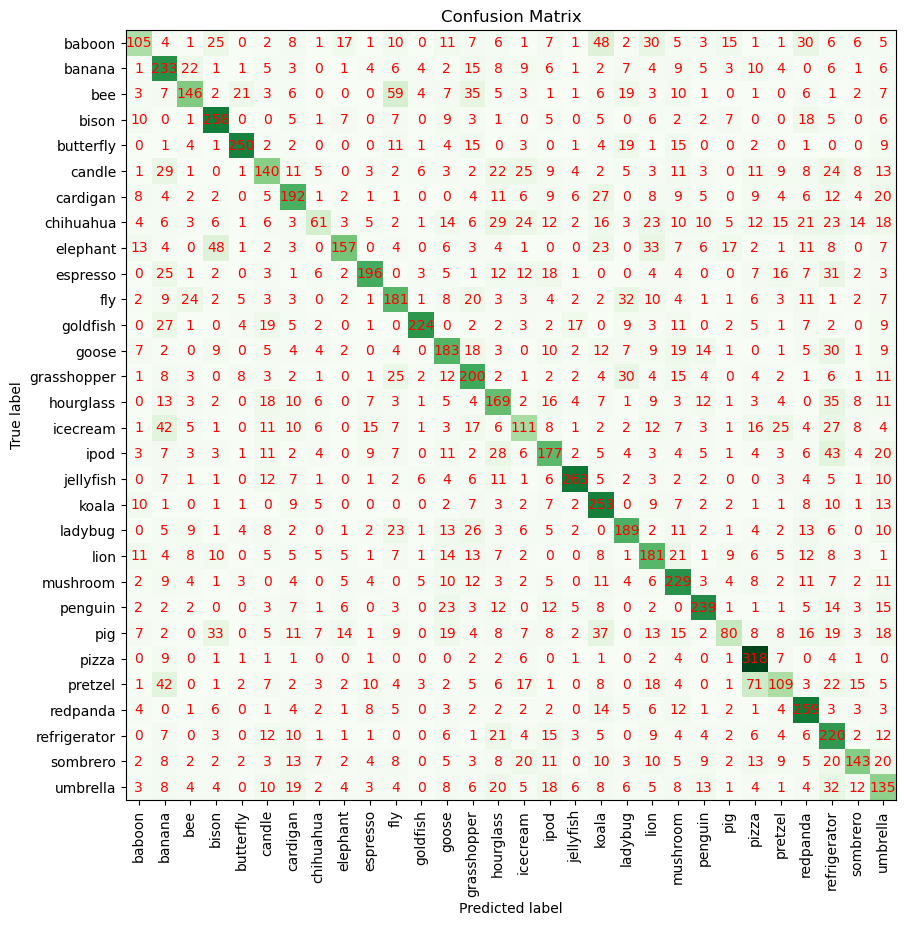

In [443]:
plot_confuion_matrix(train_cm)

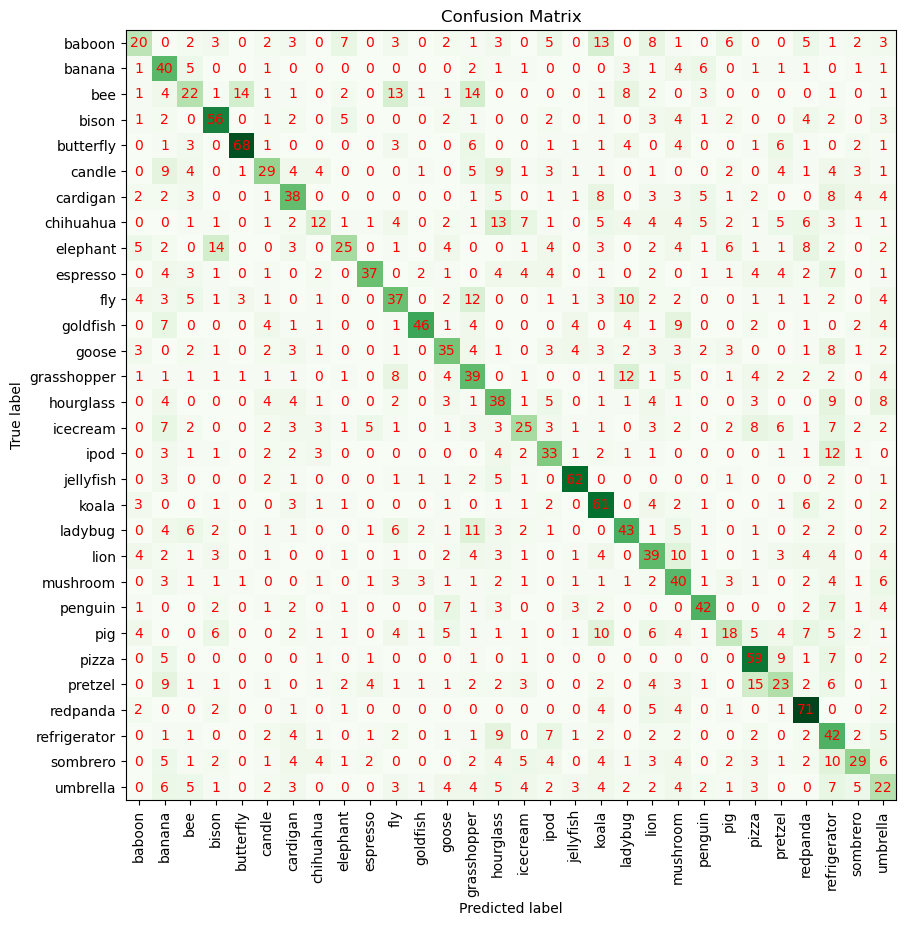

In [444]:
plot_confuion_matrix(validation_cm)

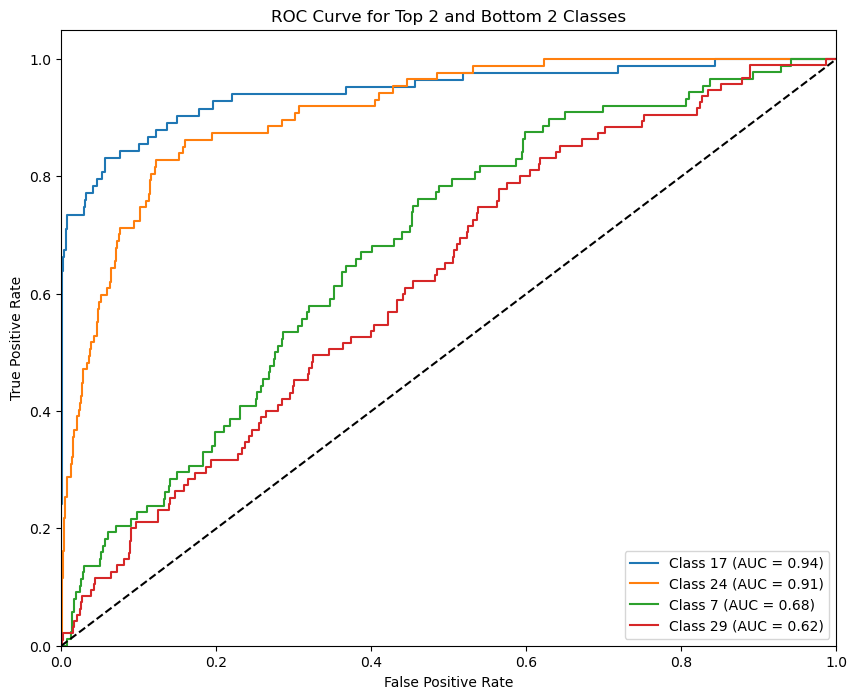

In [394]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_probs_val = np.array(y_probs_val)

# Convert class labels to a binary format
y_bin_val = label_binarize(y_true_val, classes=np.unique(y_true_val))
n_classes = y_bin_val.shape[1]

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_val[:, i], y_probs_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort classes by AUC
sorted_classes_by_auc = sorted(range(n_classes), key=lambda i: roc_auc[i], reverse=True)
top_two_classes = sorted_classes_by_auc[:2]  # top
bottom_two_classes = sorted_classes_by_auc[-2:]  # bottom

plt.figure(figsize=(10, 8))
for i in top_two_classes + bottom_two_classes:
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Top 2 and Bottom 2 Classes')
plt.legend(loc='lower right')
plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [395]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


# Mean and Standard deviation are calculated for adding data transformations

In [396]:
def _get_mean_std(loader):
    mean=0
    std=0
    total_image=0
    for images,_ in loader:
        image_count_in_a_batch=images.size(0)
        images=images.view(image_count_in_a_batch,images.size(1),-1)
        mean+= images.mean(2).sum(0)
        std=images.std(2).sum(0)
        total_image+=image_count_in_a_batch
        
    mean/=total_image
    std/=total_image
    return mean,std    

In [397]:
_get_mean_std(train_loader)

(tensor([0.4826, 0.4410, 0.3677]), tensor([0.0007, 0.0006, 0.0007]))

In [400]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split



# Define CNN Model with three hidden layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)  # Third hidden layer
        self.fc3 = nn.Linear(256, 128)  # Fourth hidden layer
        self.fc4 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))  # Third hidden layer
        x = self.relu(self.fc3(x))  # Fourth hidden layer
        x = self.fc4(x)
        return x

# Helper function -- Define top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # return top-1

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation within a range of (-10, 10) degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly adjust brightness, contrast, and saturation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random affine
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # Randomly crop and then resize
    transforms.ToTensor(),  # Tensor
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
])
custom_dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

mean = [0.4826, 0.441, 0.3678]
std = [0.0007, 0.0006, 0.0007]


# Split the dataset
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(custom_dataset, test_ratio=0.2, batch_size=32, seed=0)

# Instantiate the model. loss function, and optimizer
custom_model = CustomCNN()
optimizer = optim.Adam(custom_model.parameters(), lr=0.01)  
loss_function = nn.CrossEntropyLoss()

# Train and Val
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 8

for epoch in range(num_epochs):
    custom_model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = custom_model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Val
    custom_model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = custom_model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


Epoch 1: Train Loss: 63.9543, Train Accuracy: 2.81%, Val Loss: 3.4034, Val Accuracy: 3.61%
Epoch 2: Train Loss: 3.4040, Train Accuracy: 3.23%, Val Loss: 3.4050, Val Accuracy: 3.20%
Epoch 3: Train Loss: 3.4042, Train Accuracy: 3.14%, Val Loss: 3.4047, Val Accuracy: 2.64%
Epoch 4: Train Loss: 3.4046, Train Accuracy: 3.19%, Val Loss: 3.4042, Val Accuracy: 3.20%
Epoch 5: Train Loss: 3.4039, Train Accuracy: 3.14%, Val Loss: 3.4025, Val Accuracy: 3.39%
Epoch 6: Train Loss: 3.4048, Train Accuracy: 2.96%, Val Loss: 3.4037, Val Accuracy: 3.05%
Epoch 7: Train Loss: 3.4042, Train Accuracy: 3.24%, Val Loss: 3.4035, Val Accuracy: 2.60%
Epoch 8: Train Loss: 3.4045, Train Accuracy: 3.35%, Val Loss: 3.4034, Val Accuracy: 3.35%


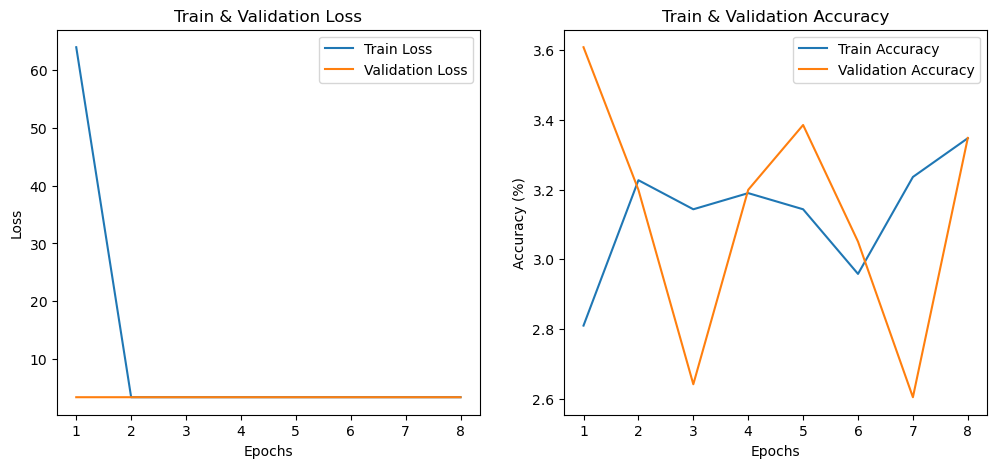

In [402]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1,num_epochs+1),train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1),val_losses, label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1,num_epochs+1),train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1),val_accuracies, label='Validation Accuracy')
plt.title('Train & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

After multiple levels of augumentations, it is observed that the accuracy of the model is heavily decreased. This might be a better option to reduce overfitting but as the accuracy is already low, this technique severely affects the model. 

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [511]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Your code here!

# Define the CNN architecture
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        # conv1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        # conv2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # maxpooling
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # conv3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        # conv4
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        # maxpooling
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        # Flatten layer
        self.flatten = nn.Flatten()
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(512, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.dropout1(self.relu(self.fc1(x)))
        x = self.dropout2(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# Define data augmentation techniques
custom_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation within a range of (-10, 10) degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly adjust brightness, contrast, and saturation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random affine
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # Randomly crop and then resize
    transforms.ToTensor(),  # Tensor
    transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
])

# Apply data augmentation and load the dataset
custom_augmented_dataset = datasets.ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=custom_transforms)

# Split dataset
custom_train_size = int(0.8 * len(custom_augmented_dataset))
custom_val_size = len(custom_augmented_dataset) - custom_train_size
custom_train_dataset, custom_val_dataset = random_split(custom_augmented_dataset, [custom_train_size, custom_val_size])

custom_train_loader = DataLoader(custom_train_dataset, batch_size=32, shuffle=True, drop_last=True)
custom_val_loader = DataLoader(custom_val_dataset, batch_size=32, shuffle=False, drop_last=True)

# Initialize the model
custom_model_CNN = CustomCNN()

# Define the loss function and optimizer
custom_loss_function = nn.CrossEntropyLoss()
custom_optimizer = optim.Adam(custom_model_CNN.parameters())

# Training
custom_num_epochs = 5
custom_train_losses = []
custom_val_losses = []
custom_train_accuracies = []
custom_val_accuracies = []

for epoch in range(custom_num_epochs):
    custom_model_CNN.train()
    custom_total_train_loss = 0
    custom_total_train_correct = 0
    custom_total_train_samples = 0

    for data, target in custom_train_loader:
        custom_optimizer.zero_grad()
        output = custom_model_CNN(data)
        loss = custom_loss_function(output, target)
        loss.backward()
        custom_optimizer.step()

        custom_total_train_loss += loss.item()
        custom_total_train_correct += (output.argmax(1) == target).type(torch.float).sum().item()
        custom_total_train_samples += target.size(0)

    custom_train_losses.append(custom_total_train_loss / len(custom_train_loader))
    custom_train_accuracies.append((custom_total_train_correct / custom_total_train_samples) * 100)

    # Validation
    custom_model_CNN.eval()
    custom_total_val_loss = 0
    custom_total_val_correct = 0
    custom_total_val_samples = 0

    with torch.no_grad():
        for data, target in custom_val_loader:
            output = custom_model_CNN(data)
            loss = custom_loss_function(output, target)

            custom_total_val_loss += loss.item()
            custom_total_val_correct += (output.argmax(1) == target).type(torch.float).sum().item()
            custom_total_val_samples += target.size(0)

    custom_val_losses.append(custom_total_val_loss / len(custom_val_loader))
    custom_val_accuracies.append((custom_total_val_correct / custom_total_val_samples) * 100)

    print(f'Epoch {epoch+1}: Train Loss: {custom_train_losses[-1]:.4f}, Train Accuracy: {custom_train_accuracies[-1]:.2f}%, '
          f'Val Loss: {custom_val_losses[-1]:.4f}, Val Accuracy: {custom_val_accuracies[-1]:.2f}%')


Epoch 1: Train Loss: 3.4754, Train Accuracy: 3.25%, Val Loss: 3.4030, Val Accuracy: 3.24%
Epoch 2: Train Loss: 3.4020, Train Accuracy: 3.35%, Val Loss: 3.4026, Val Accuracy: 3.12%
Epoch 3: Train Loss: 3.4018, Train Accuracy: 3.32%, Val Loss: 3.4025, Val Accuracy: 2.72%
Epoch 4: Train Loss: 3.4017, Train Accuracy: 3.37%, Val Loss: 3.4027, Val Accuracy: 2.68%
Epoch 5: Train Loss: 3.4016, Train Accuracy: 3.19%, Val Loss: 3.4026, Val Accuracy: 2.72%


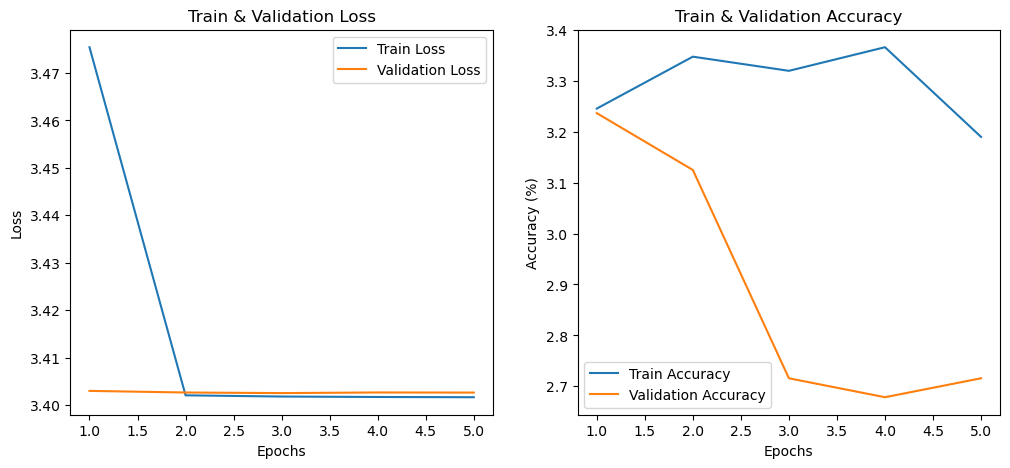

In [512]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1,custom_num_epochs+1),custom_train_losses, label='Train Loss')
plt.plot(range(1, custom_num_epochs+1),custom_val_losses, label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1,custom_num_epochs+1),custom_train_accuracies, label='Train Accuracy')
plt.plot(range(1, custom_num_epochs+1),custom_val_accuracies, label='Validation Accuracy')
plt.title('Train & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

The weight drop is decided just about 0.3% as the accuracy is even heavily damaged.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

# Learning Rate = 0.0001

In [415]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import pandas as pd

# Define CNN Model with three hidden layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)  # Third hidden layer
        self.fc3 = nn.Linear(256, 128)  # Fourth hidden layer
        self.fc4 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))  # Third hidden layer
        x = self.relu(self.fc3(x))  # Fourth hidden layer
        x = self.fc4(x)
        return x

# Helper function -- Define top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # return top-1

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation within a range of (-10, 10) degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly adjust brightness, contrast, and saturation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random affine
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # Randomly crop and then resize
    transforms.ToTensor(),  # Tensor
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
])
custom_dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

mean = [0.4826, 0.441, 0.3678]
std = [0.0007, 0.0006, 0.0007]


# Split the dataset
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(custom_dataset, test_ratio=0.2, batch_size=32, seed=0)

# Instantiate the model. loss function, and optimizer
custom_model = CustomCNN()
optimizer = optim.Adam(custom_model.parameters(), lr=0.0001)  
loss_function = nn.CrossEntropyLoss()

# Train and Val
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 8

results = []

for epoch in range(num_epochs):
    custom_model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = custom_model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Val
    custom_model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = custom_model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    results.append({
        'epoch': epoch + 1,
        'train_loss': avg_train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': avg_val_loss,
        'val_accuracy': val_accuracy
    })

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print(df_results)


Epoch 1: Train Loss: 3.0878, Train Accuracy: 13.43%, Val Loss: 2.8268, Val Accuracy: 19.64%
Epoch 2: Train Loss: 2.6907, Train Accuracy: 23.49%, Val Loss: 2.5800, Val Accuracy: 27.79%
Epoch 3: Train Loss: 2.4411, Train Accuracy: 30.58%, Val Loss: 2.4452, Val Accuracy: 30.69%
Epoch 4: Train Loss: 2.2715, Train Accuracy: 35.49%, Val Loss: 2.3981, Val Accuracy: 31.73%
Epoch 5: Train Loss: 2.1235, Train Accuracy: 39.26%, Val Loss: 2.2392, Val Accuracy: 35.83%
Epoch 6: Train Loss: 1.9970, Train Accuracy: 42.36%, Val Loss: 2.1473, Val Accuracy: 38.99%
Epoch 7: Train Loss: 1.8975, Train Accuracy: 45.08%, Val Loss: 2.1043, Val Accuracy: 39.62%
Epoch 8: Train Loss: 1.8067, Train Accuracy: 47.45%, Val Loss: 2.0250, Val Accuracy: 43.04%
   epoch  train_loss  train_accuracy  val_loss  val_accuracy
0      1    3.087777       13.427300  2.826779     19.642857
1      2    2.690720       23.488501  2.579961     27.790179
2      3    2.441129       30.582344  2.445191     30.691964
3      4    2.271497

# Learning Rate =0.001

In [407]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import pandas as pd

# Define CNN Model with three hidden layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)  # Third hidden layer
        self.fc3 = nn.Linear(256, 128)  # Fourth hidden layer
        self.fc4 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))  # Third hidden layer
        x = self.relu(self.fc3(x))  # Fourth hidden layer
        x = self.fc4(x)
        return x

# Helper function -- Define top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # return top-1

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation within a range of (-10, 10) degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly adjust brightness, contrast, and saturation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random affine
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # Randomly crop and then resize
    transforms.ToTensor(),  # Tensor
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
])
custom_dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

mean = [0.4826, 0.441, 0.3678]
std = [0.0007, 0.0006, 0.0007]


# Split the dataset
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(custom_dataset, test_ratio=0.2, batch_size=32, seed=0)

# Instantiate the model. loss function, and optimizer
custom_model = CustomCNN()
optimizer = optim.Adam(custom_model.parameters(), lr=0.001)  
loss_function = nn.CrossEntropyLoss()

# Train and Val
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 8

results = []

for epoch in range(num_epochs):
    custom_model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = custom_model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Val
    custom_model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = custom_model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    results.append({
        'epoch': epoch + 1,
        'train_loss': avg_train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': avg_val_loss,
        'val_accuracy': val_accuracy
    })

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# Convert results to DataFrame
df_results2 = pd.DataFrame(results)
print(df_results2)


Epoch 1: Train Loss: 3.4368, Train Accuracy: 3.01%, Val Loss: 3.4025, Val Accuracy: 3.31%
Epoch 2: Train Loss: 3.4021, Train Accuracy: 3.12%, Val Loss: 3.4026, Val Accuracy: 3.50%
Epoch 3: Train Loss: 3.4019, Train Accuracy: 3.19%, Val Loss: 3.4027, Val Accuracy: 2.60%
Epoch 4: Train Loss: 3.4018, Train Accuracy: 3.24%, Val Loss: 3.4028, Val Accuracy: 2.60%
Epoch 5: Train Loss: 3.4017, Train Accuracy: 3.36%, Val Loss: 3.4025, Val Accuracy: 2.64%
Epoch 6: Train Loss: 3.4017, Train Accuracy: 3.10%, Val Loss: 3.4026, Val Accuracy: 2.60%
Epoch 7: Train Loss: 3.4017, Train Accuracy: 3.47%, Val Loss: 3.4026, Val Accuracy: 2.60%
Epoch 8: Train Loss: 3.4016, Train Accuracy: 3.44%, Val Loss: 3.4026, Val Accuracy: 2.60%
   epoch  train_loss  train_accuracy  val_loss  val_accuracy
0      1    3.436832        3.013724  3.402511      3.311012
1      2    3.402139        3.115727  3.402581      3.497024
2      3    3.401913        3.189911  3.402677      2.604167
3      4    3.401830        3.236276

# Learning Rate =0.1

In [408]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import pandas as pd

# Define CNN Model with three hidden layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)  # Third hidden layer
        self.fc3 = nn.Linear(256, 128)  # Fourth hidden layer
        self.fc4 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))  # Third hidden layer
        x = self.relu(self.fc3(x))  # Fourth hidden layer
        x = self.fc4(x)
        return x

# Helper function -- Define top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # return top-1

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation within a range of (-10, 10) degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly adjust brightness, contrast, and saturation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random affine
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),  # Randomly crop and then resize
    transforms.ToTensor(),  # Tensor
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
])
custom_dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

mean = [0.4826, 0.441, 0.3678]
std = [0.0007, 0.0006, 0.0007]


# Split the dataset
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(custom_dataset, test_ratio=0.2, batch_size=32, seed=0)

# Instantiate the model. loss function, and optimizer
custom_model = CustomCNN()
optimizer = optim.Adam(custom_model.parameters(), lr=0.1)  
loss_function = nn.CrossEntropyLoss()

# Train and Val
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 8

results = []

for epoch in range(num_epochs):
    custom_model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = custom_model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Val
    custom_model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = custom_model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    results.append({
        'epoch': epoch + 1,
        'train_loss': avg_train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': avg_val_loss,
        'val_accuracy': val_accuracy
    })

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

# Convert results to DataFrame
df_results3 = pd.DataFrame(results)
print(df_results3)


Epoch 1: Train Loss: 204819128.4143, Train Accuracy: 2.98%, Val Loss: 3.4149, Val Accuracy: 2.60%
Epoch 2: Train Loss: 3.4197, Train Accuracy: 3.59%, Val Loss: 3.4234, Val Accuracy: 2.94%
Epoch 3: Train Loss: 3.4215, Train Accuracy: 3.42%, Val Loss: 3.4204, Val Accuracy: 3.87%
Epoch 4: Train Loss: 3.4248, Train Accuracy: 2.97%, Val Loss: 3.4192, Val Accuracy: 3.39%
Epoch 5: Train Loss: 3.4237, Train Accuracy: 3.19%, Val Loss: 3.4217, Val Accuracy: 3.42%
Epoch 6: Train Loss: 3.4251, Train Accuracy: 2.96%, Val Loss: 3.4237, Val Accuracy: 3.50%
Epoch 7: Train Loss: 3.4249, Train Accuracy: 3.42%, Val Loss: 3.4235, Val Accuracy: 3.09%
Epoch 8: Train Loss: 3.4265, Train Accuracy: 3.16%, Val Loss: 3.4219, Val Accuracy: 2.60%
   epoch    train_loss  train_accuracy  val_loss  val_accuracy
0      1  2.048191e+08        2.976632  3.414869      2.604167
1      2  3.419670e+00        3.588650  3.423428      2.938988
2      3  3.421537e+00        3.421736  3.420394      3.869048
3      4  3.424777e+

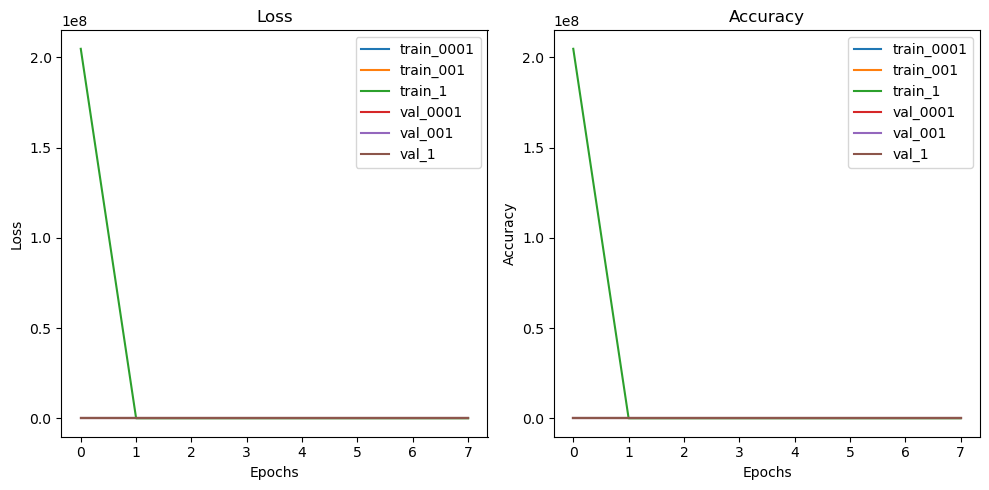

In [508]:
train_0001_loss=df_results['train_loss'].tolist()
train_0001_accuracy=df_results['train_accuracy'].tolist()
train_001_loss=df_results2['train_loss'].tolist()
train_001_accuracy=df_results2['train_accuracy'].tolist()
train_1_loss=df_results3['train_loss'].tolist()
train_1_accuracy=df_results3['train_loss'].tolist()
val_0001_loss=df_results['val_loss'].tolist()
val_0001_accuracy=df_results['val_accuracy'].tolist()
val_001_loss=df_results2['val_loss'].tolist()
val_001_accuracy=df_results2['val_accuracy'].tolist()
val_1_loss=df_results3['val_loss'].tolist()
val_1_accuracy=df_results3['val_loss'].tolist()
plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_0001_loss, label='train_0001')
plt.plot(train_001_loss, label='train_001')
plt.plot(train_1_loss, label='train_1')
plt.plot(val_0001_loss, label='val_0001')
plt.plot(val_001_loss, label='val_001')
plt.plot(val_1_loss, label='val_1')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_0001_accuracy, label='train_0001')
plt.plot(train_001_accuracy, label='train_001')
plt.plot(train_1_accuracy, label='train_1')
plt.plot(val_0001_accuracy, label='val_0001')
plt.plot(val_001_accuracy, label='val_001')
plt.plot(val_1_accuracy, label='val_1')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
 

# Finalised model with Finalised Parameters

In [414]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define CNN Model with three hidden layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)  # Third hidden layer
        self.fc3 = nn.Linear(256, 128)  # Fourth hidden layer
        self.fc4 = nn.Linear(128, 30)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.maxpool1(self.relu(self.conv1(x)))
        x = self.maxpool1(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.maxpool2(self.relu(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))  # Third hidden layer
        x = self.relu(self.fc3(x))  # Fourth hidden layer
        x = self.fc4(x)
        return x

# Helper function -- Define top-k accuracy
def calculate_topk_accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in topk:
        correct_k = correct[:k].contiguous().view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res[0].item()  # return top-1

# Data preprocessing and loading
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
custom_dataset = ImageFolder(root='/Users/vishanthsuresh/Downloads/Data Science/Deep Learning/comp5625M_data_assessment_1/train_set/train_set', transform=transform)

# Split the dataset
def create_data_loaders(dataset, test_ratio=0.2, batch_size=32, seed=0):
    torch.manual_seed(seed)
    val_size = int(len(dataset) * test_ratio)
    train_size = len(dataset) - val_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    return train_loader, val_loader

train_loader, val_loader = create_data_loaders(custom_dataset, test_ratio=0.2, batch_size=32, seed=0)

# Instantiate the model. loss function, and optimizer
custom_model = CustomCNN()
optimizer = optim.Adam(custom_model.parameters(), lr=0.001) 
loss_function = nn.CrossEntropyLoss()

# Train and Val
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 15

for epoch in range(num_epochs):
    custom_model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = custom_model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
        total_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
        total_samples += target.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Val
    custom_model.eval()
    val_loss, val_correct, val_samples = 0, 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = custom_model(data)
            loss = loss_function(output, target)

            val_loss += loss.item()
            accuracy_percent = calculate_topk_accuracy(output, target, topk=(1,))
            val_correct += accuracy_percent / 100.0 * target.size(0)  # Convert percentages to the number of samples
            val_samples += target.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples * 100
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')


Epoch 1: Train Loss: 3.3692, Train Accuracy: 4.53%, Val Loss: 3.3353, Val Accuracy: 4.69%
Epoch 2: Train Loss: 3.2866, Train Accuracy: 7.04%, Val Loss: 3.2153, Val Accuracy: 9.26%
Epoch 3: Train Loss: 3.0490, Train Accuracy: 12.07%, Val Loss: 2.8939, Val Accuracy: 14.88%
Epoch 4: Train Loss: 2.7713, Train Accuracy: 18.94%, Val Loss: 2.6623, Val Accuracy: 20.83%
Epoch 5: Train Loss: 2.5631, Train Accuracy: 24.24%, Val Loss: 2.4825, Val Accuracy: 26.90%
Epoch 6: Train Loss: 2.3548, Train Accuracy: 30.29%, Val Loss: 2.3540, Val Accuracy: 29.87%
Epoch 7: Train Loss: 2.1701, Train Accuracy: 35.80%, Val Loss: 2.2483, Val Accuracy: 35.23%
Epoch 8: Train Loss: 2.0021, Train Accuracy: 40.70%, Val Loss: 2.1859, Val Accuracy: 36.72%
Epoch 9: Train Loss: 1.8547, Train Accuracy: 44.71%, Val Loss: 2.1621, Val Accuracy: 37.72%
Epoch 10: Train Loss: 1.7183, Train Accuracy: 48.42%, Val Loss: 2.2790, Val Accuracy: 36.31%
Epoch 11: Train Loss: 1.5832, Train Accuracy: 52.21%, Val Loss: 2.1479, Val Accurac

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [473]:




all_images = []
class loadTestData(Dataset):

  def __init__(self, main_dir, transform):
    self.main_dir = main_dir
    self.transform = transform
    all_images = os.listdir(main_dir)
    self.total_images = natsorted(all_images)
   
  def __len__(self):
    return len(self.total_images)

  def __getitem__(self, index):
    image_path = os.path.join(self.main_dir, self.total_images[index])
    im = plt.imread(image_path)
    if len(im.shape) == 2:
        #convert grayscale to RGB
        im=torch.from_numpy(im)
        im=torch.stack([im,im,im],0)
        im=torch.transpose(im,0,2)
        im=im.numpy()
    transformed_image = self.transform(im)
    return transformed_image






In [474]:
finaltestset = loadTestData(r'/Users/vishanthsuresh/Downloads/comp5625M_data_assessment_1/test_set/test_set', transform=transforms.ToTensor())
testset_loader = torch.utils.data.DataLoader(finaltestset, batch_size=1, shuffle=False)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [475]:
model = custom_model
model.to(device)
predicted_labels = []

model.eval()
with torch.no_grad():
    for inputs in testset_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _,predicted = torch.max(outputs.data, 1)
        predicted_labels.append(predicted.item())  
        
test_labels = []
for filepath in finaltestset.total_images:
    filename = os.path.basename(filepath)
    test_labels.append(filename)
# Write the predicted labels to a CSV file
results_df = pd.DataFrame({
    'Id' : test_labels,
    'Category' : predicted_labels,
})


In [476]:
results_final.head()

,Id,Category
0,0a32f209_1b6e.JPEG,20
1,0a130fb8_b027.JPEG,8
2,0a547c95_69b1.JPEG,20
3,0ad55c32_0758.JPEG,8
4,0ae03fbb_5363.JPEG,8


In [478]:
results_df.to_csv("mm23vs.csv", header = True, index = False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [496]:
trnsfrm = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(hue=0.25, saturation=0.25, brightness=0.25),
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9,1.1)),
    transforms.RandomHorizontalFlip(p=0.2)
])

train_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_loader_cifar = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=24,
    shuffle=False,
    num_workers=2
)
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [497]:
alexnet = models.alexnet(pretrained=True)

In [498]:
import torch.nn as nn
import torch

# Assuming new_model is the pre-trained model
num_features = new_model.classifier[-1].in_features
new_model.classifier[-1] = torch.nn.Linear(num_features, 10)

# Modify convolutional layers
new_model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
new_model.features[2] = nn.MaxPool2d(kernel_size=2, stride=2)
new_model.features[3] = nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1)
new_model.features[5] = nn.MaxPool2d(kernel_size=2, stride=2)
new_model.features[12] = nn.MaxPool2d(kernel_size=2, stride=2)


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [501]:
# Modifying AlexNet for a different task
custom_classifier = nn.Linear(4096, 10)  # Adjusting for 10 classes

# Loss function and optimizer definition
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_pretrained.parameters(), lr=0.001)

# Lists for recording loss and accuracy during training
train_losses_unfrozen = []
train_accuracies_unfrozen = []

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    alexnet_pretrained.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {epoch+1}"):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = alexnet_pretrained(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_losses_unfrozen.append(epoch_loss)
    train_accuracies_unfrozen.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Training Finished')


Epoch 1: 100%|██████████████████████████████| 1563/1563 [23:15<00:00,  1.12it/s]


Epoch [1/2], Loss: 2.3038, Accuracy: 9.83%


Epoch 2: 100%|██████████████████████████████| 1563/1563 [22:41<00:00,  1.15it/s]

Epoch [2/2], Loss: 2.3035, Accuracy: 9.87%
Training Finished


#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [506]:
from tqdm import tqdm

# Define the frozen model
frozen_model = models.alexnet()

# Copy the pretrained weights to the frozen model
for source_param, target_param in zip(alexnet.parameters(), frozen_model.parameters()):
    target_param.data.copy_(source_param)

# Modify the classifier for the new task
num_features = frozen_model.classifier[-1].in_features
frozen_model.classifier[-1] = torch.nn.Linear(num_features, 10)

# Modify the first layers of the model
frozen_model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
frozen_model.features[2] = nn.MaxPool2d(kernel_size=2, stride=2)
frozen_model.features[3] = nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1)
frozen_model.features[5] = nn.MaxPool2d(kernel_size=2, stride=2)
frozen_model.features[12] = nn.MaxPool2d(kernel_size=2, stride=2)

# Freeze layers
for param in frozen_model.parameters():
    param.requires_grad = False

# Unfreeze certain layers
for param in frozen_model.classifier[:6].parameters():
    param.requires_grad = True

# Define criterion and optimizer
frozen_model.criterion = nn.CrossEntropyLoss()
frozen_model.optimizer = optim.SGD(filter(lambda p: p.requires_grad, frozen_model.parameters()), lr=0.001, momentum=0.9)

# Move model to device
frozen_model.to(device)

train_losses_frozen = []
train_accuracies_frozen = []

# Training with progress bar
for epoch in range(2):
    frozen_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(tqdm(train_loader_cifar, desc=f"Epoch {epoch+1}"), 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        frozen_model.optimizer.zero_grad()

        outputs = frozen_model(inputs)
        loss = frozen_model.criterion(outputs, labels)
        loss.backward()
        frozen_model.optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader_cifar)
    epoch_accuracy = 100 * correct / total
    train_losses_frozen.append(epoch_loss)
    train_accuracies_frozen.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/2], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Training Finished')


Epoch 1: 100%|██████████████████████████████| 3125/3125 [08:10<00:00,  6.37it/s]


Epoch [1/2], Loss: 2.1475, Accuracy: 19.52%


Epoch 2: 100%|██████████████████████████████| 3125/3125 [08:14<00:00,  6.32it/s]

Epoch [2/2], Loss: 2.0534, Accuracy: 23.53%
Training Finished


#### 4.3 Compare above configurations and comment on performances. (4 marks)

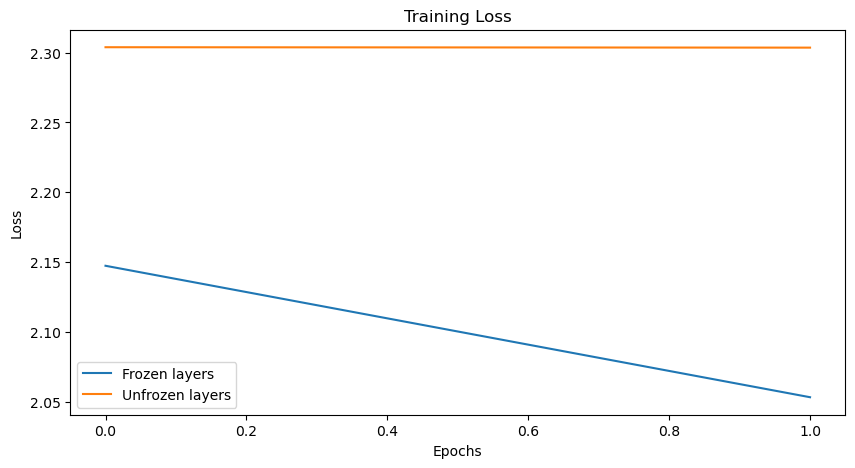

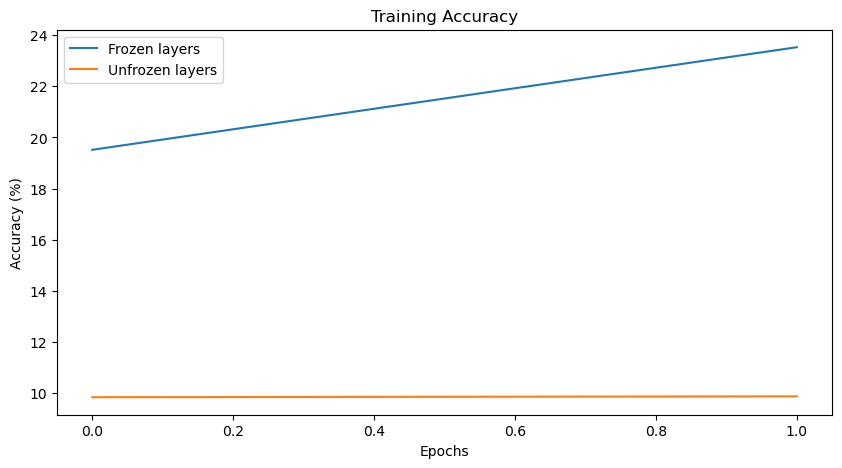

In [507]:
# Your graphs here and please provide comment in markdown in another cell
plt.figure(figsize=(10, 5))
plt.plot(train_losses_frozen, label='Frozen layers')
plt.plot(train_losses_unfrozen, label='Unfrozen layers')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accuracies_frozen, label='Frozen layers')
plt.plot(train_accuracies_unfrozen, label='Unfrozen layers')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [233]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [224]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [327]:
# Load the feature map provided to you
features_map = torch.load('/Users/vishanthsuresh/Downloads/COMP5625M_data_assessment_2/resnet50_caption.pt', map_location=device)


#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [328]:
import json
import pandas as pd

with open('/Users/vishanthsuresh/Downloads/COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [329]:
coco_subset = pd.read_csv("/Users/vishanthsuresh/Downloads/COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [330]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
#from helperDL import gen_clean_captions_df
def gen_clean_captions_df(df):

    # Remove spaces in the beginning and at the end
    # Convert to lower case
    # Replace all non-alphabet characters with space
    # Replace all continuous spaces with a single space
    clean_caption = df["caption"] \
        .str.strip() \
        .str.lower() \
        .replace(r"[^a-z ]+", "", regex=True) \
        .replace(r"[ ]+", " ", regex=True)

    # add to dataframe
    df["clean_caption"] = clean_caption

    return df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [331]:
##### Spilt your training, validation and test dataset with indexes to each set
#from helperDL import split_ids
import random
def split_ids(image_id_list, train=.7, valid=0.1, test=0.2):
    """
    Args:
        image_id_list (int list): list of unique image ids
        train (float): train split size (between 0 - 1)
        valid (float): valid split size (between 0 - 1)
        test (float): test split size (between 0 - 1)
    """
    list_copy = image_id_list.copy()
    random.shuffle(list_copy)
    
    train_size = math.floor(len(list_copy) * train)
    valid_size = math.floor(len(list_copy) * valid)
    
    return list_copy[:train_size], list_copy[train_size:(train_size + valid_size)], list_copy[(train_size + valid_size):]


train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [332]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [333]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [334]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
#from helperDL import build_vocab
MIN_FREQUENCY = 3
def build_vocab(df_ids, new_file, vocab):
    """ 
    Parses training set token file captions and builds a Vocabulary object and dataframe for 
    the image and caption data

    Returns:
        vocab (Vocabulary): Vocabulary object containing all words appearing more than min_frequency
    """
    word_mapping = Counter()

    # for index in df.index:
    for index, id in enumerate(df_ids):
        caption = str(new_file.loc[new_file['image_id']==id]['clean_caption'])
        for word in caption.split():
            # also get rid of numbers, symbols etc.
            if word in word_mapping:
                word_mapping[word] += 1
            else:
                word_mapping[word] = 1



    # add the words to the vocabulary
    for word in word_mapping:
        # Ignore infrequent words to reduce the embedding size
        if word_mapping[word] > MIN_FREQUENCY:
            vocab.add_word(word)

    return vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2370


In [335]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2532

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [336]:
#from helperDL import EncoderCNN
class EncoderCNN(nn.Module):
    def __init__(self):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)

        # TO COMPLETE
        # keep all layers of the pretrained net except the last one
        layers = list(resnet.children())[:-1]   
        # unpack the layers and create a new Sequential
        self.resnet = nn.Sequential(*layers)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.resnet(images)
            
        features = features.reshape(features.size(0), -1)
        return features
model = EncoderCNN() 
print(model)

/Users/vishanthsuresh/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vishanthsuresh/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [337]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
#features = torch.load("coco_features.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
#checkpoint = torch.load("ckpt file here") 
#model.load_state_dict(checkpoint['model_state_dict'])

' Load the saved image feature maps and trained model ("provided to you") '

In [338]:
##### Preparing the train, val and test dataloaders
#from helperDL import COCO_Features
#from helperDL import caption_collate_fn

MAX_SEQ_LEN = 47
class COCO_Features(Dataset):
    """ COCO custom dataset with features and vocab, compatible with torch.utils.data.DataLoader. """
    
    def __init__(self, df, vocab, features, padded=False, max_len=MAX_SEQ_LEN):
        """ Set the path for images, captions and vocabulary wrapper.
        
        Args:
            df (str list): dataframe of image meta
            captions (str list): list of str captions
            vocab: vocabulary wrapper
            features: torch Tensor of extracted features
        """
        self.df = df
        self.vocab = vocab
        self.features = features
        
        self.padded = padded
        self.max_len = max_len

    def __getitem__(self, index):
        """ Returns one data pair (feature and target caption). """

        # path = IMAGE_DIR + str(self.df.iloc[index]['file_name'])

        entry = self.df.iloc[index]
        image_id = entry["file_name"]   

        image_features = self.features[image_id]

        # convert caption (string) to word ids.
        tokens = self.df.iloc[index]['clean_caption'].split()
        caption = []

          # build the Tensor version of the caption, with token words
        caption.extend([self.vocab(token) for token in tokens])
        caption.append(self.vocab('<end>'))
        target = torch.Tensor(caption)

        return image_features, target.int()

    def __len__(self):
        return len(self.df)


def caption_collate_fn(data):
    """ Creates mini-batch tensors from the list of tuples (image, caption).
    Args:
        data: list of tuple (image, caption). 
            - image: torch tensor of shape (3, 224, 224).
            - caption: torch tensor of shape (?); variable length.
    Returns:
        images: torch tensor of shape (batch_size, 3, 224, 224).
        targets: torch tensor of shape (batch_size, padded_length).
        lengths: list; valid length for each padded caption.
    """
    # Sort a data list by caption length from longest to shortest.
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # merge images (from tuple of 3D tensor to 4D tensor).
    # if using features, 2D tensor to 3D tensor. (batch_size, 256)
    images = torch.stack(images, 0) 

    # merge captions (from tuple of 1D tensor to 2D tensor).
    lengths = [len(cap) for cap in captions]
    # pad with zeros
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]        
    return images, targets, lengths

# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [339]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [347]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence as pack_pad_seq

class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        super(DecoderRNN, self).__init__()
        self.resize = nn.Linear(2048, embed_size)  # Resize feature vector
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        self.embed = nn.Embedding(vocab_size, embed_size)

        # GRU
        self.gru = nn.GRU(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length

    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)
        packed = pack_pad_seq(embeddings, lengths, batch_first=True, enforce_sorted=False)
        hiddens, _ = self.gru(packed)
        outputs = self.linear(hiddens[0])  # Use hidden states to predict
        return outputs

    def sample(self, features, states=None):
        sampled_ids = []
        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.gru(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)
            inputs = inputs.unsqueeze(1)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [348]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [349]:
# Assuming train_loader, valid_loader, NUM_EPOCHS, device, and LR are defined
# Initialize the model, loss, and optimizer
decoder = DecoderRNN(vocab_size=len(vocab))  # Make sure to define vocab_size
decoder = decoder.to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(decoder.parameters(), lr=LR)

# Initialize lists to keep track of losses
train_losses = []
valid_losses = []

NUM_EPOCHS = 10

# Training loop
for epoch in range(NUM_EPOCHS):
    decoder.train()
    total_train_loss = 0
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        features_ = features_.to(device)
        captions_ = captions_.to(device)
        targets = pack_padded_sequence(captions_, lengths_, batch_first=True, enforce_sorted=False)[0]

        optimizer.zero_grad()
        outputs = decoder(features_, captions_, lengths_)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Print training progress
        if i % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {i+1}/{len(train_loader)}, Train Loss: {loss.item():.4f}")

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loop
    decoder.eval()
    total_valid_loss = 0
    with torch.no_grad():
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            features_ = features_.to(device)
            captions_ = captions_.to(device)
            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]

            outputs = decoder(features_, captions_, lengths_)
            loss = criterion(outputs, targets)
            total_valid_loss += loss.item()

            # Print validation progress
            if i % 50 == 0:
                print(f"Epoch {epoch+1}, Validation Batch {i+1}/{len(valid_loader)}, Valid Loss: {loss.item():.4f}")

    avg_valid_loss = total_valid_loss / len(valid_loader)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Valid Loss = {avg_valid_loss:.4f}")


Epoch 1, Batch 1/555, Train Loss: 7.8429
Epoch 1, Batch 101/555, Train Loss: 3.8696
Epoch 1, Batch 201/555, Train Loss: 3.8468
Epoch 1, Batch 301/555, Train Loss: 3.4307
Epoch 1, Batch 401/555, Train Loss: 3.0826
Epoch 1, Batch 501/555, Train Loss: 2.8624
Epoch 1, Validation Batch 1/80, Valid Loss: 2.8614
Epoch 1, Validation Batch 51/80, Valid Loss: 2.7355
Epoch 1: Train Loss = 3.5793, Valid Loss = 3.0398
Epoch 2, Batch 1/555, Train Loss: 2.6062
Epoch 2, Batch 101/555, Train Loss: 2.4902
Epoch 2, Batch 201/555, Train Loss: 2.3278
Epoch 2, Batch 301/555, Train Loss: 2.7019
Epoch 2, Batch 401/555, Train Loss: 2.6509
Epoch 2, Batch 501/555, Train Loss: 2.4780
Epoch 2, Validation Batch 1/80, Valid Loss: 2.4885
Epoch 2, Validation Batch 51/80, Valid Loss: 2.9864
Epoch 2: Train Loss = 2.6672, Valid Loss = 2.8528
Epoch 3, Batch 1/555, Train Loss: 2.4321
Epoch 3, Batch 101/555, Train Loss: 2.2627
Epoch 3, Batch 201/555, Train Loss: 2.2968
Epoch 3, Batch 301/555, Train Loss: 2.5411
Epoch 3, Bat

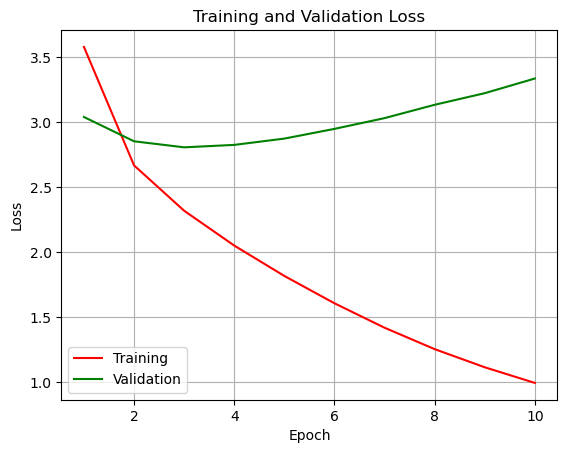

In [353]:
stats = [
    [3.5793, 3.0398],
    [2.6672, 2.8528],
    [2.3182, 2.8064],
    [2.0500, 2.8251],
    [1.8162, 2.8736],
    [1.6058, 2.9484],
    [1.4176, 3.0312],
    [1.2528, 3.1339],
    [1.1131, 3.2232],
    [0.9927, 3.3361]
]

# Plotting
fig = plt.figure()
plt.plot(range(1, len(stats) + 1), [s[0] for s in stats], 'r', label='Training')
plt.plot(range(1, len(stats) + 1), [s[1] for s in stats], 'g', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Since Training Loss became too low and validation loss didnt become low after a certain point, epochs is set as 10.

In [354]:
# save model after training
decoder_ckpt = torch.save(decoder, "/Users/vishanthsuresh/Downloads/COMP5625M_data_assessment_2/coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [368]:
import os
from PIL import Image
from torch.utils.data import Dataset

class COCOImagesDataset(Dataset):
    def __init__(self, dataframe, root_directory, transform=None):
        self.dataframe = dataframe
        self.root_directory = root_directory
        self.transform = transform

    def __getitem__(self, index):
        img_path = os.path.join(self.root_directory, self.dataframe.iloc[index]['file_name'])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        file_name = self.dataframe.iloc[index]['file_name']
        return image, file_name

    def __len__(self):
        return len(self.dataframe)


data_transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])


dataset_test = COCOImagesDataset(dataframe=test_set, root_directory="/Users/vishanthsuresh/Downloads/COMP5625M_data_assessment_2/coco/images/", transform=data_transform)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=True, num_workers=0)

In [369]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2532, 256)
  (gru): GRU(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2532, bias=True)
)

In [370]:
def decode_caption(sampled_ids, vocab):
    """ 
    Args:
        ref_captions (str list): ground truth captions
        sampled_ids (int list): list of word IDs from decoder
    """
    # Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        if word != '<start>':
            if word == '<end>':
                break
        
        sampled_caption.append(word)

    sentence = ' '.join(sampled_caption)
    return sentence


def timshow(x):
    x = (x-x.min())/(x.max()-x.min())
    x = x.detach().clamp_(min=0, max=1).mul(255).type(torch.uint8)
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.axis('off')
    plt.show()
    return xa

In [372]:
# getting functions from helperDL.py
#from helperDL import timshow
#from helperDL import decode_caption

REFERENCES:
people stand around an electric skillet while pancakes are made
a man making pancakes at a picnic table
a man grills food while people stand around and watch
a man makes pancakes on a griddle at a picnic table while people watch nearby
a man standing over a griddle in a park
GENERATED 
a group of people playing a game of frisbee <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>




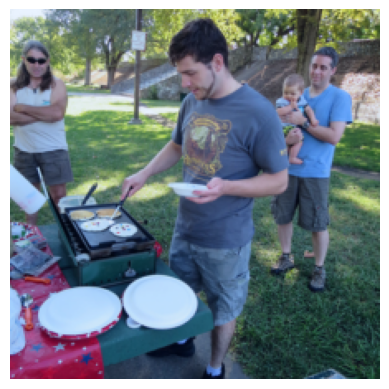

REFERENCES:
a woman executes a snow board trick while she has a great view of mountains
a man that is jumping a snow board
a man flying through the air while riding a snowboard
a snow boarder in mid air with the board
a young woman on a snowboard does a flip
GENERATED 
a person on a snowboard jumping in the air <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>




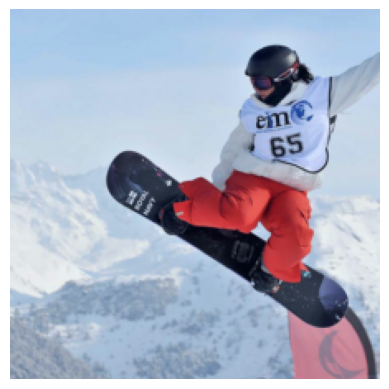

REFERENCES:
a woman cutting a cake with her bra strap showing
a woman is cutting a large chocolate cake
a very happy woman cutting a piece of cake
a woman with a pink bow is cutting a chocolate cake
a woman posing with utensils in front of a cake
GENERATED 
a woman cutting a pizza on a table <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>




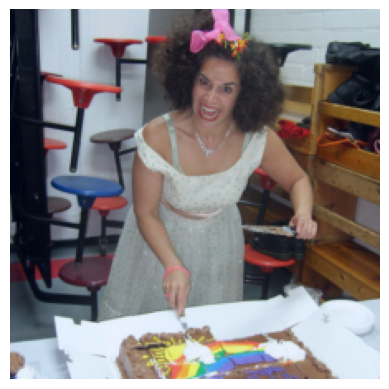

REFERENCES:
a crowd of people sitting around together in front of a building
a large group of people outside eating together
people seated and standing at a food festival
a large group of people are sitting at tables outside and some are standing
some people sit in chairs at tables outside while others stand near and under a tent
GENERATED 
a group of people in a room on a street <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end> <end>




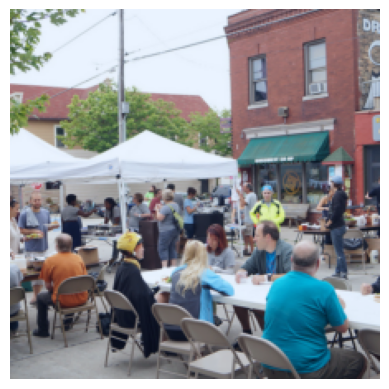

In [374]:
IMAGES_TO_SHOW = 4
idx = 0

with torch.no_grad():
    for i, (image, filename) in enumerate(test_loader):
        # Your code here
        if idx > IMAGES_TO_SHOW-1:
            break

        features = features_map[filename[0]].to(device).unsqueeze(0)  # Add Batch Dimension
        sampled_ids = decoder.sample(features)
        sampled_ids = sampled_ids.cpu().numpy()

        # Ensure that "sampled_ids" is a one-dimensional array and correctly processed into an integer sequence
        reference_captions = test_set[test_set['file_name'] == filename[0]]['clean_caption'].tolist()
        print("REFERENCES:")
        for ref_cap in reference_captions:
            print(ref_cap)
            
        sampled_ids = np.squeeze(sampled_ids)  # Remove singleton dimensions
        generated_caption = ' '.join([vocab.idx2word[word_id.item()]for word_id in sampled_ids if word_id.item() in vocab.idx2word])
        print(f"GENERATED \n{generated_caption}\n")

     
        print("===================================\n")

        timshow(image[0].cpu())
        idx += 1
        if idx == IMAGES_TO_SHOW:
            break


#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.